# About RSi

What is: The relative strength index (RSI) is a momentum indicator used in technical analysis. RSI measures the speed and magnitude of a security's recent price changes to evaluate overvalued or undervalued conditions in the price of that security.

# Importing data

In [1]:
import pandas as pd
import numpy as np 
import yfinance as yf 
from datetime import date, timedelta
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 

In [2]:
asset = 'AMZN'
end_date = date.today()
start_date = end_date - timedelta(365*20) # 20 years

end_date, start_date

(datetime.date(2024, 2, 2), datetime.date(2004, 2, 7))

In [3]:
df = yf.download(asset, start_date, end_date)

df = df.dropna()

[*********************100%%**********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-02-09,2.337500,2.340000,2.285000,2.293000,2.293000,122922000
2004-02-10,2.292500,2.312500,2.275500,2.279500,2.279500,98980000
2004-02-11,2.293000,2.368000,2.277000,2.357000,2.357000,157634000
2004-02-12,2.346500,2.405000,2.335500,2.353000,2.353000,135144000
2004-02-13,2.364500,2.385000,2.312000,2.319000,2.319000,108634000
...,...,...,...,...,...,...
2024-01-26,158.419998,160.720001,157.910004,159.119995,159.119995,51047400
2024-01-29,159.339996,161.289993,158.899994,161.259995,161.259995,45270400
2024-01-30,160.699997,161.729996,158.490005,159.000000,159.000000,45207400


# Calculating asset returns 

In [5]:
df['Return'] = df['Adj Close'].pct_change()

In [6]:
df = df.dropna()

In [7]:
df.sample(4)

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2017-02-08,40.634499,41.074001,40.625000,40.985500,40.985500,57160000,0.008874
2021-09-15,172.126007,174.270996,170.100494,173.789505,173.789505,59150000,0.007475
2019-03-04,84.250000,85.471497,83.718002,84.808502,84.808502,123348000,0.014620
2018-06-12,84.650002,84.975502,84.575996,84.937500,84.937500,45184000,0.005701


# Calculating average return (positive and negative)

Here is important two things:
- create a column with the absolute values
- then create a moving average of 14 days (two weeks)

In [8]:
df['Positive Returns'] = df['Return'].apply(lambda x: x if x > 0 else 0)
df['Negative Returns'] = df['Return'].apply(lambda x: x*-1 if x <0 else 0)

In [9]:
# PAR = Positive Average Return 
df['PAR'] = df['Positive Returns'].rolling(window = 14).mean()

# NAR = Negative Average Return 
df['NAR'] = df['Negative Returns'].rolling(window = 14).mean()

In [10]:
df = df.dropna()

In [11]:
df.sample(4)

,Open,High,Low,Close,Adj Close,Volume,Return,Positive Returns,Negative Returns,PAR,NAR
Date,,,,,,,,,,,
2018-06-19,85.452003,86.805496,85.019501,86.738998,86.738998,85802000,0.006375,0.006375,0.000000,0.005555,0.000848
2020-06-11,130.175003,133.569000,126.811501,127.898003,127.898003,116002000,-0.033802,0.000000,0.033802,0.007563,0.004269
2018-01-23,66.904503,68.245003,66.866997,68.126999,68.126999,103386000,0.026542,0.026542,0.000000,0.010484,0.000651
2006-04-17,1.823500,1.831000,1.752500,1.763500,1.763500,88844000,-0.036865,0.000000,0.036865,0.008539,0.008300


# RSI

- RSI = 100 - 100 / (1 + RS)
- RS = PAR / NAR

In [12]:
df['RSI'] = 100 - (100 / (1 + df['PAR']/df['NAR']))

In [13]:
df.sample(8)

,Open,High,Low,Close,Adj Close,Volume,Return,Positive Returns,Negative Returns,PAR,NAR,RSI
Date,,,,,,,,,,,,
2021-08-09,167.180496,167.744003,166.425995,167.093506,167.093506,42964000,-0.000918,0.000000,0.000918,0.003861,0.008386,31.522996
2009-09-30,4.613000,4.708500,4.571500,4.668000,4.668000,170784000,0.017881,0.017881,0.000000,0.012049,0.004035,74.913393
2009-05-18,3.698000,3.798000,3.655000,3.797500,3.797500,136582000,0.031929,0.031929,0.000000,0.007143,0.012687,36.021139
2006-07-03,1.926000,1.931000,1.911500,1.930500,1.930500,28726000,-0.001810,0.000000,0.001810,0.011672,0.001279,90.124168
2015-03-05,19.280500,19.421000,19.194500,19.391500,19.391500,53870000,0.013352,0.013352,0.000000,0.006104,0.004048,60.125404
2013-06-17,13.817500,14.010000,13.782500,13.903000,13.903000,57680000,0.014855,0.014855,0.000000,0.007195,0.004275,62.728111
2015-12-24,33.167500,33.234001,33.029999,33.139500,33.139500,21824000,-0.001371,0.000000,0.001371,0.004817,0.005756,45.562655
2008-12-15,2.532500,2.547500,2.407500,2.442500,2.442500,145708000,-0.046829,0.000000,0.046829,0.025095,0.014110,64.009090


<Axes: xlabel='Date'>

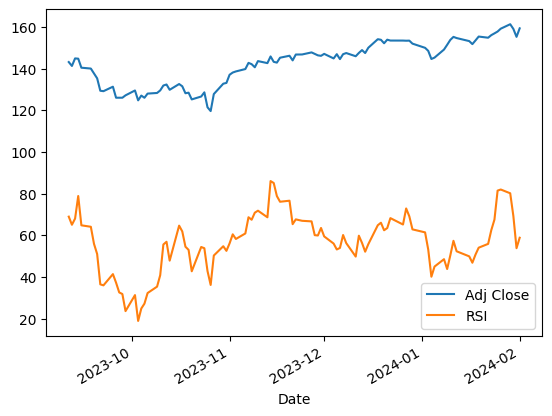

In [14]:
# Selected only 100 days just to see more clearly the chart
df[['Adj Close','RSI']].tail(100).plot()

# Long position

- Buy = When RSI cross above 30
- Sell = When RSI cross above 70 or stop loss of x days

In [15]:
def long_position_dates(df, stop_loss_time):

    buy_dates = []
    sell_dates = []

    for i in range(1, len(df)): # Taking away the first element

        rsi_day_before = df.iloc[i-1]['RSI']
        rsi_today = df.iloc[i]['RSI']

        # This indicate that RSI crossed above 30
        if (rsi_day_before < 30) & (rsi_today >= 30):

            try: # This is for those cases that it is on te last element of df
                buy_dates.append(df.iloc[i+1].name) # buy next day

                for j in range(1, stop_loss_time+1): # Stop loss of x days or crossed above 70
                    
                    try:
                        new_rsi_day_before = df.iloc[i+j-1]['RSI']
                        new_rsi_today = df.iloc[i+j]['RSI']

                        if (new_rsi_day_before < 70) & (new_rsi_today >= 70):
                            sell_dates.append(df.iloc[i+j+1].name) # sell next day
                            break
                            
                        elif j == stop_loss_time:
                            try:
                                sell_dates.append(df.iloc[i+j+1].name)
                            except:
                                sell_dates.append(df.iloc[-1].name) # this is for operations in the nearest x days
                    
                    except:
                        buy_dates.remove(df.iloc[i+1].name)

            except:
                'The last element error :('
                
    return [buy_dates, sell_dates]

In [16]:
lp_dates = long_position_dates(df, 30)

lp_buy_dates = lp_dates[0]
lp_sell_dates = lp_dates[1]

In [17]:
len(lp_buy_dates), len(lp_sell_dates)

(127, 127)

# Short position

- Sell = RSI cross below 70
- Buy = RSI cross below 30

In [18]:
def short_position_dates(df, stop_loss_time):

    buy_dates = []
    sell_dates = []

    for i in range(1, len(df)): # Taking away the first element

        rsi_day_before = df.iloc[i-1]['RSI']
        rsi_today = df.iloc[i]['RSI']
        
        # This indicate that RSI crossed below 70
        if (rsi_day_before > 70) & (rsi_today <= 70):

            try: # This is for those cases that it is on te last element of df

                sell_dates.append(df.iloc[i+1].name) # Sell next day

                for j in range(1, stop_loss_time+1): # Stop loss of x days or crossed below 20
                    
                    try:
                        new_rsi_day_before = df.iloc[i+j-1]['RSI']
                        new_rsi_today = df.iloc[i+j]['RSI']

                        if (new_rsi_day_before > 20) & (new_rsi_today <= 20):
                            buy_dates.append(df.iloc[i+j+1].name) # buy next day
                            break
                            
                        elif j == stop_loss_time:
                            try:
                                buy_dates.append(df.iloc[i+j+1].name)
                            except:
                                buy_dates.append(df.iloc[-1].name) # this is for operations in the nearest x days
                    
                    except:
                        sell_dates.remove(df.iloc[i+1].name)
                        
            except:
                'The last element error :('

    return [buy_dates, sell_dates]

In [19]:
sp_dates = short_position_dates(df, 30)

sp_buy_dates = sp_dates[0]
sp_sell_dates = sp_dates[1]

In [20]:
len(sp_buy_dates), len(sp_sell_dates)

(206, 206)

# Comparison with buy and hold

In [21]:
buy_n_hold_return = ((df.iloc[-1]['Adj Close'] - df.iloc[0]['Adj Close']) / df.iloc[0]['Adj Close']) * 100
buy_n_hold_return

7313.544394905067

In [22]:
def find_returns(df, b_dates, s_dates):

    operation_returns = []

    for i in range(len(b_dates)):
        
        buy_price = df.loc[b_dates[i]]['Adj Close']
        sell_price = df.loc[s_dates[i]]['Adj Close']

        operation_return = (sell_price - buy_price) / buy_price

        operation_returns.append(operation_return)
    
    return operation_returns

In [23]:
lp_return = find_returns(df, lp_buy_dates, lp_sell_dates)
sp_return = find_returns(df,sp_buy_dates, sp_sell_dates)

- Positives and negative returns

In [24]:
lp_win_returns = []
lp_lost_returns = []

for i in lp_return:
    if i > 0: lp_win_returns.append(i)
    if i < 0: lp_lost_returns.append(i)

In [25]:
sp_win_returns = []
sp_lost_returns = []

for i in sp_return:
    if i > 0: sp_win_returns.append(i)
    if i < 0: sp_lost_returns.append(i)

In [26]:
lp_perc_win = len(lp_win_returns) / len(lp_return) * 100
lp_perc_lost = len(lp_lost_returns) / len(lp_return) * 100

print(f'Long position winning trades: {round(lp_perc_win,2)}%')
print(f'Long position losing trades: {round(lp_perc_lost,2)}%')

Long position winning trades: 72.44%
Long position losing trades: 27.56%


In [27]:
sp_perc_win = len(sp_win_returns) / len(sp_return) * 100
sp_perc_lost = len(sp_lost_returns) / len(sp_return) * 100

print(f'Short position winning trades: {round(sp_perc_win,2)}%')
print(f'Short position losing trades: {round(sp_perc_lost,2)}%')

Short position winning trades: 40.29%
Short position losing trades: 59.71%


In [28]:
lp_average_win = np.mean(lp_win_returns)
lp_average_lost = np.mean(lp_lost_returns)

print(f'Average of long position winning trades: {round(lp_average_win,3)}% per trade')
print(f'Average of long position losing trades: {round(lp_average_lost,3)}% per trade')

Average of long position winning trades: 0.094% per trade
Average of long position losing trades: -0.085% per trade


In [29]:
sp_average_win = np.mean(sp_win_returns)
sp_average_lost = np.mean(sp_lost_returns)

print(f'Average of short position winning trades: {round(sp_average_win,3)}% per trade')
print(f'Average of short position losing trades: {round(sp_average_lost,3)}% per trade')

Average of short position winning trades: 0.086% per trade
Average of short position losing trades: -0.081% per trade


- Cumulative return

In [30]:
lp_cumulative_return = ((np.cumprod(1 + np.array(lp_return)) - 1) * 100)[-1]
lp_cumulative_return

12255.421021634465

In [31]:
sp_cumulative_return = ((np.cumprod(1 + np.array(sp_return)) - 1) * 100)[-1]
sp_cumulative_return

-98.12724099196089

In [32]:
lp_sp_cumulative_return = np.mean([lp_cumulative_return, sp_cumulative_return])
lp_sp_cumulative_return

6078.646890321253

- RSI vs Buy and Hold

In [33]:
print(f'Buy n hold return: {round(buy_n_hold_return,2)}%')
print(f'RSI model return: {round(lp_sp_cumulative_return,2)}%')

Buy n hold return: 7313.54%
RSI model return: 6078.65%
